# <font color="purple">**Licenciatura en Tecnologías para la Información en Ciencias**</font>

## <font color="blue">**Procesamiento Digital de Imágenes**</font>

### <font color="blue">**Tareas 3: Filtros y detección de bordes**</font>

### Angélica Nayeli Rivas Bedolla:    418128734

### Semestre 2021-1

### Domingo 29 de noviembre de 2020

In [21]:
#Cargar bibliotecas necesarias
import numpy as np
import cv2
import matplotlib.pyplot as plt 

#hacer más grandes las figuras
from matplotlib.pyplot import figure

# Introducción

Los filtros a utillizar en esta tarea son:

## Suavizado Gaussiano

Este filtro es similar al filtro de la media: disminuye la nitidez, hace la imagen más borrosa y pierde detalles. A comparación del filtro de la media, el filtro gaussiano produce un suavisado más uniforme. 
La imagen obtenida está basada en una media ponderada local del filtro de entrada donde los coeficientes se ajustan a una campana de Gauss dependiente de $\sigma$. Se usa un kernel modelando la función gaussiana:

<center> $G(x,y) = \frac{1}{2\pi\sigma^2}e^{-\frac{x^2+y^2}{2\sigma^2}}$</center>

$\sigma^2$ indica el nivel del suavisado:
 1. $\sigma$ grande: Campana más ancha (más suavizado).
 2. $\sigma$ pequeña: Campana más estrecha (menos suavizado).

Su principal ventaja es que es separable. En lugar de usar una convolución 2D puede realizar 2 convoluciones unidimensionales (una horizontal y otra vertical).



## Normalización de contraste local

Este filtro se utiliza para reducir el efecto de iluminación no uniforme en una imagen. 
La normalización de contraste local tiende a uniformizar la media y la varianza de una imagen vecindarios.
Se modela la ecuación:

<center>$G(x,y) = \frac{Img(x,y)-m_f(x,y)}{\sigma_f(x,y)}$</center>

Donde:
 1. $Img(x,y)$ es la imagen original en las coordenadas (x,y)
 2. $m_f(x,y)$ es la media local ponderada (gaussiana) de $Img(x,y)$.
 3. $\sigma_f(x,y)$ es la estimación de la varianza local.



## Contrast Limited Adaptive Histogram Equalization (CLAHE)

Este filtro se utiliza para mejorar el contraste local y mejorar la definición de los bordes en la imagen, la amplificación del contraste es limitada, para reducir el problema de amplificación de ruido. Utiliza histogramas de valores por regiones de la imagen, estos histogramas son redistribuidos, así, el valor más pequeño de la imagen se convierte en el valor más pequeño que puede tener cada pixel ($0$) y el valor más grande en la imagen se convierte en el valor más pequeño que puede tener cada pixel ($255$).


## Canny Edge Detection

_Opencv_ describe el algoritmo de **Canny Edge Dectection** como un algoritmo de múltiples etapas:
 1. Reducción de ruido.
 
    Se reduce el ruido con un filtro de suavisado. En la implementación de _opencv_ usan suavisado gaussiano

 2. Encontrar el gradiente de intensidad de la imagen.

    A la imagen obtenida en el paso anterior se le aplica un filtro Sobel en irección vertical ($G_y$) y horizontal ($G_x$) de los cuales se puede obtener el la magnitud de la gradiente y dirección de cada píxel.

 3. Supresión no máxima.
    
    Se realiza un análisis completo de la imagen para eliminar los píxeles no deseados que pueden no ser un borde. Para ello, en cada píxel, se comprueba si el píxel es un máximo local en su vecindad en la dirección del gradiente, de ser así, se considera para la siguiente etapa; de lo contrario, se suprime (se pone a cero).

 4. Umbral de histéresis

    A partir de dos umbrales _valor mínimo_ y _valor máximo_. Cuando la intensidad del gradiente es mayor que _valor máximo_ seguramente serán bordes; si es menor que _valor mínimo_ seguramente no son bordes; si queda en medio se clasifica dependiendo de a qué tipo de píxel está conectado (borde o no borde).


# Enunciado del problema

Investigar e implementar los filtros **Suavisado Gaussiano** y **Normalización de contraste local**.

Investigar, escribir pseudocódigo y aplicar con _opencv_ **Contrast Limited Adaptive Histogram Equalization (CLAHE)** y **Canny**.

Explicar los los parámetros usados, los resultados obtenidos y   tus conclusiones.

Dado a la complejidad de los algoritmos y que mis implementaciones necesitaban muchos parches para servir solo entregaré una parte de la asignación que será:

 1. La teoría detrás de los filtros de **Suavisado Gaussiano**, **Normalización de contraste local**, **Contrast Limited Adaptive Histogram Equalization (CLAHE)** y **Canny**.
 2. El código necesario para obtener los filtros **Suavisado Gaussiano**, **Contrast Limited Adaptive Histogram Equalization (CLAHE)** y **Canny** en _opencv_.
 

# Código fuente

## Cargar imágenes

En la tarea s pide hacer los ejercicios con las figuras 6 a la 9 pero en el folder _ejercicios 01_ hay 2 imágenes llamadas _**figura6.jpeg**_ y _**figura6.jpg**_ así que haré ambas _**figura6**_ para la tarea.

In [3]:
path = "."

In [9]:
figura_6  = path + "figura6.jpg"
figura_6e = path + "figura6.jpeg"
figura_7  = path + "figura7.jpg"
figura_8  = path + "figura8.jpg"
figura_9  = path + "figura9.jpg"

In [10]:
figura_6 = cv2.imread(figura_6, 0) 
figura_6e = cv2.imread(figura_6e, 0) 
figura_7 = cv2.imread(figura_7, 0) 
figura_8 = cv2.imread(figura_8, 0) 
figura_9 = cv2.imread(figura_9, 0) 

### Visualizarlas

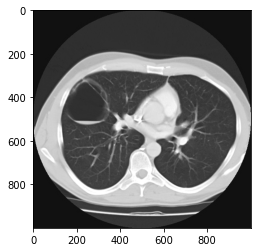

In [11]:
plt.imshow(figura_6, "gray")

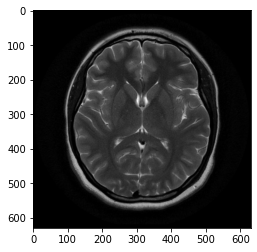

In [12]:
plt.imshow(figura_6e, "gray")

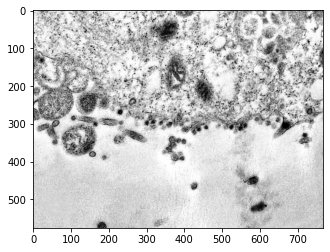

In [13]:
plt.imshow(figura_7, "gray")

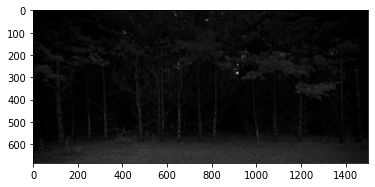

In [14]:
plt.imshow(figura_8, "gray")

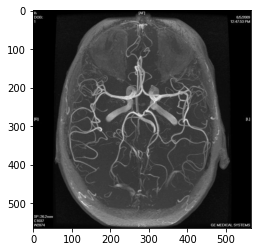

In [15]:
plt.imshow(figura_9, "gray")

Todas necesitan de los detalles para su uso. Las imágenes médicas de preferencia deben quedar más detalladas y la del bosque debe quedar más clara. Por ello, deduzco que ninguna mejorará con el suavisado gaussiano.

## Suavisado Gaussiano

Si no se le indica sigmaY toma el mismo que X imitando el algoritmo $O(n^2)$.

Si sigmaX es 0, sigmaX y sigmaY serán calculados por el algoritmo.

In [ ]:
## Algoritmo del filtro gaussiano
def FiltroGaussiano(img, k, sigma=1):
    """
    autora: Angelica Rivas
    Recibe:
        img: matriz de la imagen
        k: tamanio del kernel
        sigma: sigma para distribución uniforme
    Devuelve:
        imagen con filtro de suavisado gaussiano
    """
    ###################
    ##Calcular Kernel##
    ###################
    #calculo la mascara, 0 en el centro, entre mas se aleja mas grande es el numero
    coordenadas = np.arange(-(k // 2), (k // 2)+1)
    kernel = np.zeros((k,k))
    
    #obtener el valor en distribucion normal para cada punto en mascara
    comun = 2*(sigma**2) #es comun en division y exponencial de e
    parte1 = 1/(np.pi * comun)
    for y in range(k):
        for x in range(k):
            kernel[x,y] = parte1 * (np.e ** (-(coordenadas[x]**2+coordenadas[y]**2)/comun))
    
    return cv2.filter2D(src=img, ddepth=-1, kernel=kernel) 

Este en específico pierde demasiada calidad con el suavisado, por ello dejo que el algoritmo elija el sigmaX.

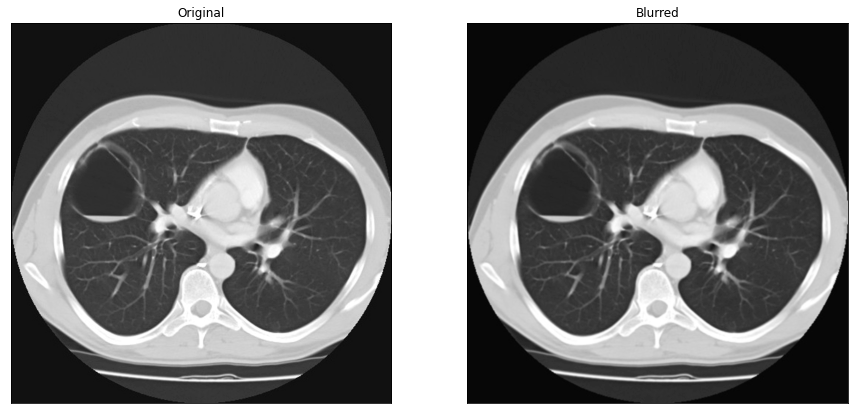

In [35]:
blur = cv2.GaussianBlur(figura_6,(5,5),sigmaX=0)

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(figura_6, "gray"),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur, "gray"),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

La tomografía necesita calidad para presentar información, el suavisado no ayuda para ello.
Por esta razón, se una un sigma pequeño así solo se difumina el contorno de la figura (la tipo aureola del craneo).
sigmaX=10.

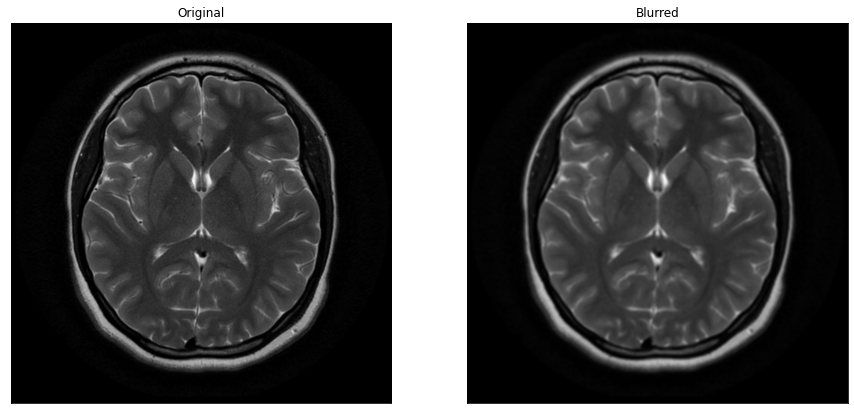

In [40]:
blur = cv2.GaussianBlur(figura_6e,(5,5),sigmaX=10)

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(figura_6e, "gray"),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur, "gray"),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

Si mal no recuerdo esta es una imagen del virus SARS-CoV-2 se necesita observar la estructura del virus par alo cual no se debe perder mucho detalle de los organismos aquí presentados. sigmaX = 2.

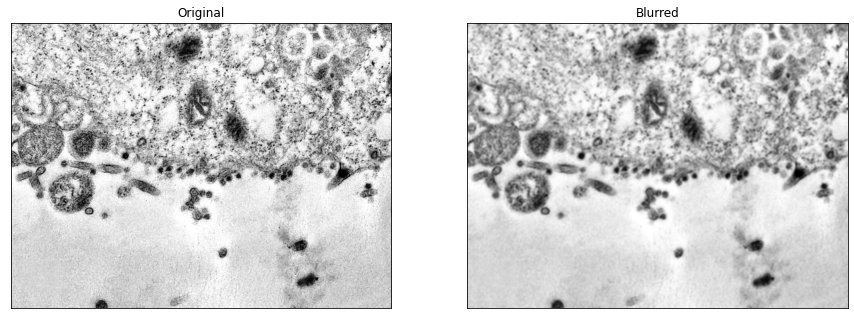

In [45]:
blur = cv2.GaussianBlur(figura_7,(5,5),sigmaX=2)

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(figura_7, "gray"),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur, "gray"),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

A contraste del oque pensé anteriormente, el suavisado ayuda a distribuir la iluminación en la imagen, por ello elegí un sigmaX = 100 (alto).

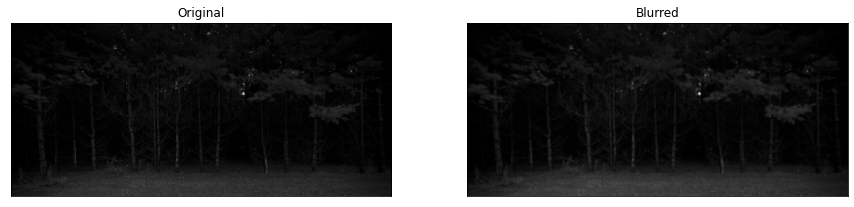

In [48]:
blur = cv2.GaussianBlur(figura_8,(5,5),sigmaX=100)

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(figura_8, "gray"),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur, "gray"),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

No estoy sefura de que es la imagen pero los tipo "gusanos" que ahí se muestran se ven con mayor contraste al tener el filtro de suavisado. Por ello, elegí un sigmaX = 1.5 (pequeño) para no perder demasiada información pero igual perder detalles extras de la imagen.

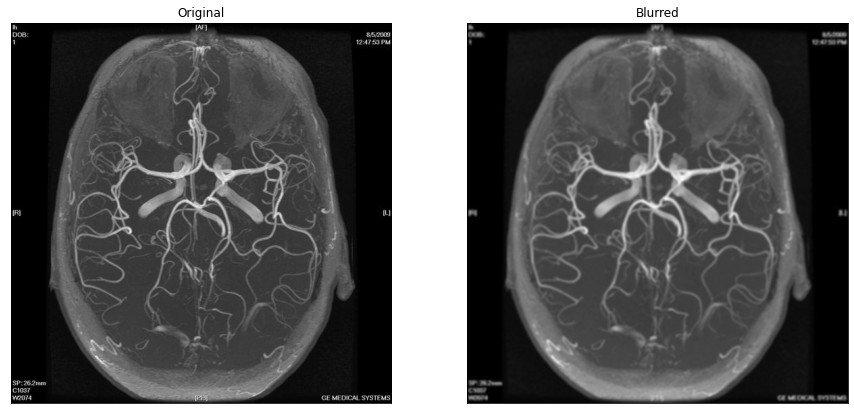

In [58]:
blur = cv2.GaussianBlur(figura_9,(5,5),sigmaX=1.5)

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(figura_9, "gray"),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur, "gray"),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

## CLAHE

Creo en esta sección se verán beneficiados las impagenes medicas al resaltar bordes que se necesitan para obtener información.


Al querer más detalle pero tampoco exagerado, uso un limite de 2 y un _tile size_ de 4x4.

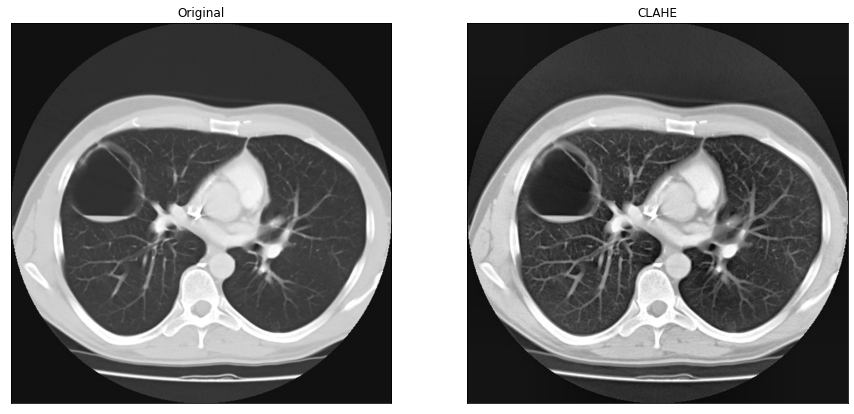

In [73]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4,4))
output = clahe.apply(figura_6)

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(figura_6, "gray"),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(output, "gray"),plt.title('CLAHE')
plt.xticks([]), plt.yticks([])
plt.show()

En el siguiente hay dos opciones de resultados:

1. CLAHE1 que es con un _tile size_ de 4x4 donde resalta la parte blanca de la tomografía.
2. CLAHE2 que es con un _tile size_ de 14x14 donde resalta la parte negra de la tomografía.

La desición de dejar ambos resultados es porque dependiendo de la aplicación es qué parte le interesa analizar (por ende resaltar) al investigador.

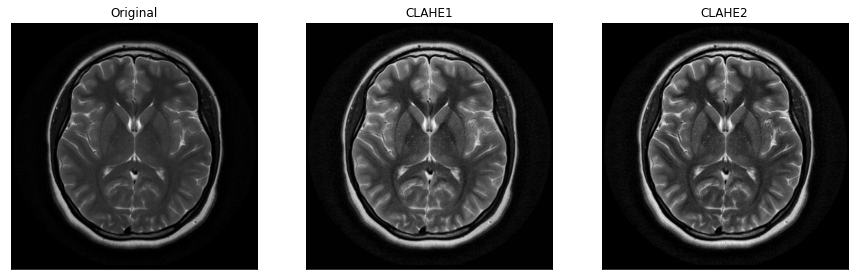

In [87]:
clahe = cv2.createCLAHE(clipLimit=1.5, tileGridSize=(4,4))
output1 = clahe.apply(figura_6e)
clahe = cv2.createCLAHE(clipLimit=1.5, tileGridSize=(14,14))
output2 = clahe.apply(figura_6e)

plt.figure(figsize=(15,15))
plt.subplot(131),plt.imshow(figura_6e, "gray"),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(output1, "gray"),plt.title('CLAHE1')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(output2, "gray"),plt.title('CLAHE2')
plt.xticks([]), plt.yticks([])
plt.show()

Un límite de 1.5 y _tile size_ de 8x8 para poder controlar la iluminación sin generar demasiado ruido en la parte inferior de la imagen, que si se pone un límite superior a 1.5 se empiezan a marcar mucho los puntos negros ahora apenas observables.

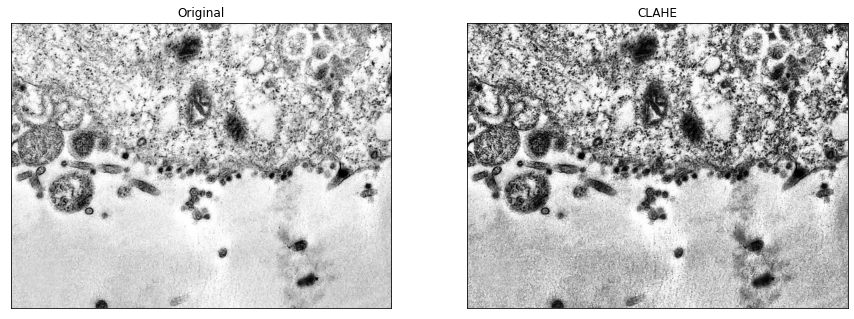

In [93]:
clahe = cv2.createCLAHE(clipLimit=1.5, tileGridSize=(8,8))
output = clahe.apply(figura_7)

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(figura_7, "gray"),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(output, "gray"),plt.title('CLAHE')
plt.xticks([]), plt.yticks([])
plt.show()

Se observa dos experimentos:

1. CLAHE adecuado: donde se usa un límite de 3.5 y un _tile size_ de 4x4 que mejora a un nivel aceptable (como magia) la imagen.
2. CLAHE extremo: donde se usan parametros exagerados (límite de 40 y un _tile size_ de 8x8) que ayuda a apreciar el alcance del filtro al poder demostrar todo lo que contiene la imagen y no se logra observar en la original.

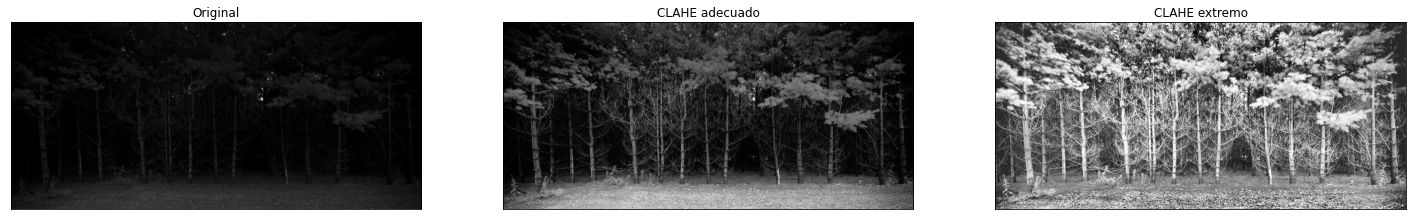

In [107]:
clahe = cv2.createCLAHE(clipLimit=3.5, tileGridSize=(4,4))
output1 = clahe.apply(figura_8)
clahe = cv2.createCLAHE(clipLimit=40, tileGridSize=(8,8))
output2 = clahe.apply(figura_8)

plt.figure(figsize=(25,25))
plt.subplot(131),plt.imshow(figura_8, "gray"),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(output1, "gray"),plt.title('CLAHE adecuado')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(output2, "gray"),plt.title('CLAHE extremo')
plt.xticks([]), plt.yticks([])
plt.show()

Con un límite de dos y un _tile size_ de 8x8 logra una mejora increíble al poder observar mejor los elementos de la imagen, anteriormente llamados "gusanos".

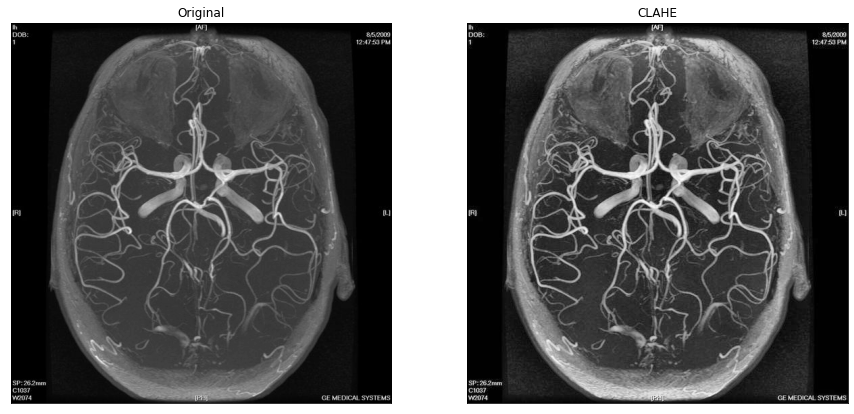

In [110]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
output = clahe.apply(figura_9)

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(figura_9, "gray"),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(output, "gray"),plt.title('CLAHE')
plt.xticks([]), plt.yticks([])
plt.show()

## Canny

threshold1 es el valor mínimo y threshold2 es el valór máximo como establecido en la teoría mostrada en la introducción.


Como esta imagen necesita muchos detallespara ser interpretada (incluyendo la tonalidad en grises) no se puede apresciar bein la figura al ser solo bordes.

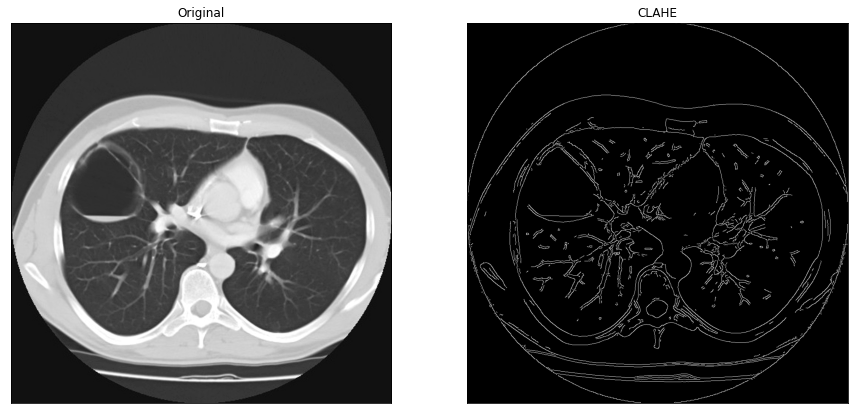

In [126]:
output = cv2.Canny(figura_6, threshold1=55, threshold2=80)

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(figura_6, "gray"),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(output, "gray"),plt.title('CLAHE')
plt.xticks([]), plt.yticks([])
plt.show()

Lo mismo que el de arriba, se necesitan más detalles para aprecir la imagen pero incluso sin esos deetalles esta imagen se puede entender un poco más.

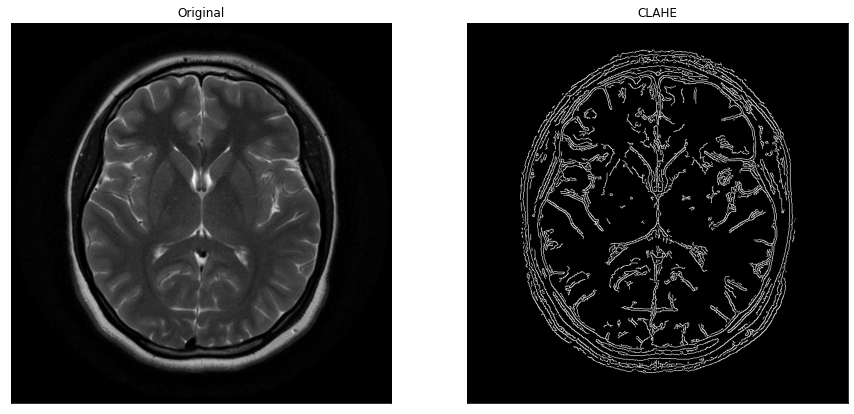

In [130]:
output = cv2.Canny(figura_6e, threshold1=35, threshold2=80)

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(figura_6e, "gray"),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(output, "gray"),plt.title('CLAHE')
plt.xticks([]), plt.yticks([])
plt.show()

Al haber demasiadas figuras pequeñas en la imagen es difícil alcanzar una imagen con buena caracterización de los bordes y que la imagen se entienda.

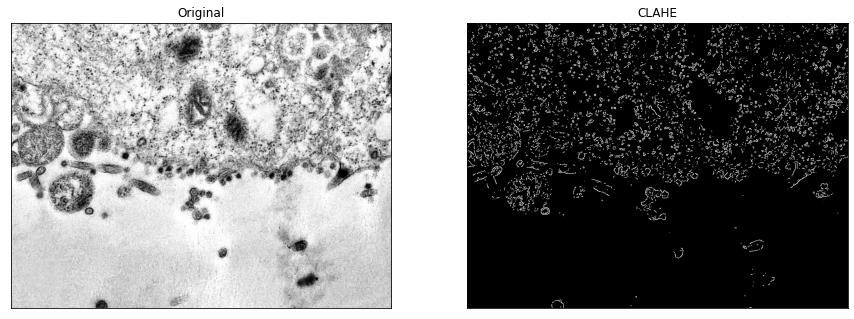

In [141]:
output = cv2.Canny(figura_7, threshold1=420, threshold2=480)

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(figura_7, "gray"),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(output, "gray"),plt.title('CLAHE')
plt.xticks([]), plt.yticks([])
plt.show()

Al ser una imagen con demasiados detalles es difícil no dejar pasar ruido y si se pone muy alto el límite superior se pierde información.

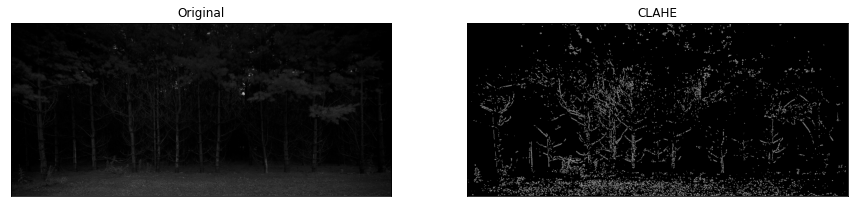

In [157]:
output = cv2.Canny(figura_8, threshold1=75, threshold2=90)

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(figura_8, "gray"),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(output, "gray"),plt.title('CLAHE')
plt.xticks([]), plt.yticks([])
plt.show()

Es muy bueno para detectar esas estructuras llamadas anteriormente "gusanos" y logra eliminar casi por completo el ruido que hay al rededor de estas estrucutras, aunque, varias de estas estructuras se perdieron.

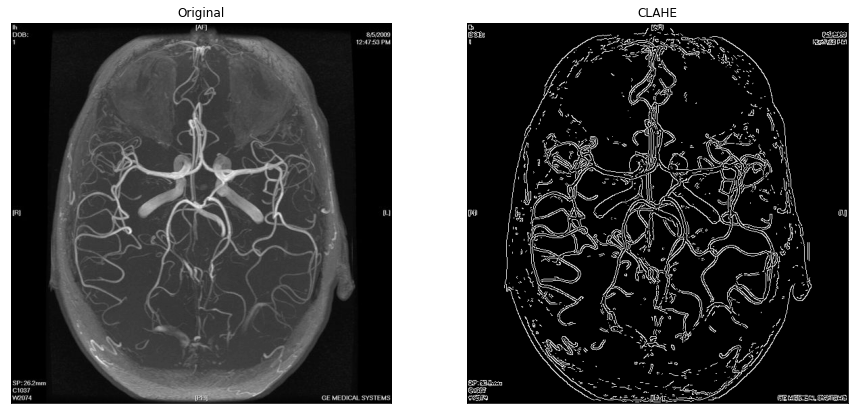

In [160]:
output = cv2.Canny(figura_9, threshold1=95, threshold2=110)

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(figura_9, "gray"),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(output, "gray"),plt.title('CLAHE')
plt.xticks([]), plt.yticks([])
plt.show()

# Conclusiones

Al poder poner en práctica los algoritmos de **Suavisado Gaussiano**, **Contrast Limited Adaptive Histogram Equalization (CLAHE)** y **Canny** pude notar las diferentes situaciones para las que funciona cada uno y crear un conocimiento tácito a partir de esta experimentación. El filtro de **Suavisado Gaussiano** funciona no solo cuando quieres suavisar imágenes, también funciona para eliminar ruido, pero su uso debe ser cuidadoso si no puede haber pérdida de información. El filtro de **Contrast Limited Adaptive Histogram Equalization (CLAHE)** se convirtió en mi filtro favorito por mucho (al menos en estas aplicaciones) funciona tanto para resaltar los bordes como para eliminar irregularidades en la iluminación. El filtro **Canny** es un filtro que se debe usar con cuidado porque no para toda aplicación va a servir, entre menor ruido tenga la imagen mejor será el resultado de salida al detectar bordes que solo sean propias de la imagen que se quiere analizar.

# Referencias

1. Montiel González, Carlos. (2019). Procesamiento digital de imágenes. [Blog]. Accedido de https://classroom.google.com/c/MTYxNjI3NzE3ODUy
2. Dpto. Matemática Aplicada. Procesamiento en el dominio espacial. Accedido de http://asignatura.us.es/imagendigital/Tema2-ParteII_Filtros.pdf
3. González Penedo, Manuel F.. Filtrado espacial. Accedido de http://www.varpa.org/~mgpenedo/cursos/Ip/Tema4/nodo4_2.html
4. OpenCV: Smoothing Images. (2020). Accedido de https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html
5. D. Sage, M. Unser, Teaching Image-Processing Programming in Java, IEEE Signal Processing Magazine, vol. 20, no. 6, pp. 43-52, November 2003.
6. Adaptive histogram equalization. (2020). Accedido de https://en.wikipedia.org/wiki/Adaptive_histogram_equalization
7. OpenCV: Histograms - 2: Histogram Equalization. (2020). Accedido de https://docs.opencv.org/master/d5/daf/tutorial_py_histogram_equalization.html
8. OpenCV: Canny Edge Detection. (2020). Accedido de https://docs.opencv.org/master/da/d22/tutorial_py_canny.html
9. OpenCV: Image Filtering. (2020). Accedido de https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1